# Import

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# set path
path = r"..\\2022\\2. Data\\"

# load data:
cds_5y = pd.read_csv(path+"5YCDS.csv").iloc[:,1:] # daily CDS spread (5Y tenor)
equity_weekly = pd.read_csv(path + "equities_1wk.csv") # weekly closing price
equity_monthly  = pd.read_csv(path + "equities_1mo.csv") # weekly closing price

In [12]:
# Name choosen as per Notebook 1. Download and Clean data
names = ["AAL", "ALLY", "AMD", "AMKR", "F"]

In [13]:
# Select the Data we are interested in. 

# equity closing price
equity_m = equity_monthly.loc[:,names] # monthly closing price
equity_w = equity_weekly.loc[:,names] # weekly closing price

# cds spread - daily frequency
cds_d = cds_5y.loc[:,names] # daily 

# Data transformation

- first we convert closing price into returns
- we then normalised the data

In [14]:
# Convert equity closing price into linear returns
# Normaliased the equity "n_"

# Monthly "_m"
returns_m = ((equity_m-equity_m.shift(1))/equity_m.shift(1)).dropna()
n_returns_m = (returns_m - returns_m.mean()) / returns_m.std(ddof = 1).dropna()# remove NA row
#n_returns_m.to_csv(path+"Matlab\\input\\n_returns_m.csv")


# Convert equity closing price into linear returns
# Normaliased the equity
returns_w = ((equity_w-equity_w.shift(1))/equity_w.shift(1)).dropna()
n_returns_w = (returns_w - returns_w.mean()) / returns_w.std(ddof = 1).dropna()# remove NA row
# n_returns_w.to_csv(path+"Matlab\\input\\n_returns_w.csv")



# Convert daily cds spread into cds differences (Delta CDS =CDS_i-CDS_(i-1) )

cds_diff_d = (cds_d-cds_d.shift(1)).dropna()
# cds_diff_d.to_csv(path+"Matlab\\input\\cds_diff_d.csv")

# Normaliased the CDS Spread difference
n_cds_d = (cds_diff_d - cds_diff_d.mean()) / cds_diff_d.std(ddof = 1).dropna()
# n_cds_d.to_csv(path+"Matlab\\input\\n_cds_d.csv")




In [15]:
print("Data size for Monthly return: ", len(n_returns_m))
print("Data size for Weekly return: ", len(n_returns_w))
print("Data size for Daily normalised CDS: ", len(cds_diff_d))
print("Data size for Daily CDS diff: ", len(n_cds_d))

Data size for Monthly return:  101
Data size for Weekly return:  440
Data size for Daily normalised CDS:  417
Data size for Daily CDS diff:  417


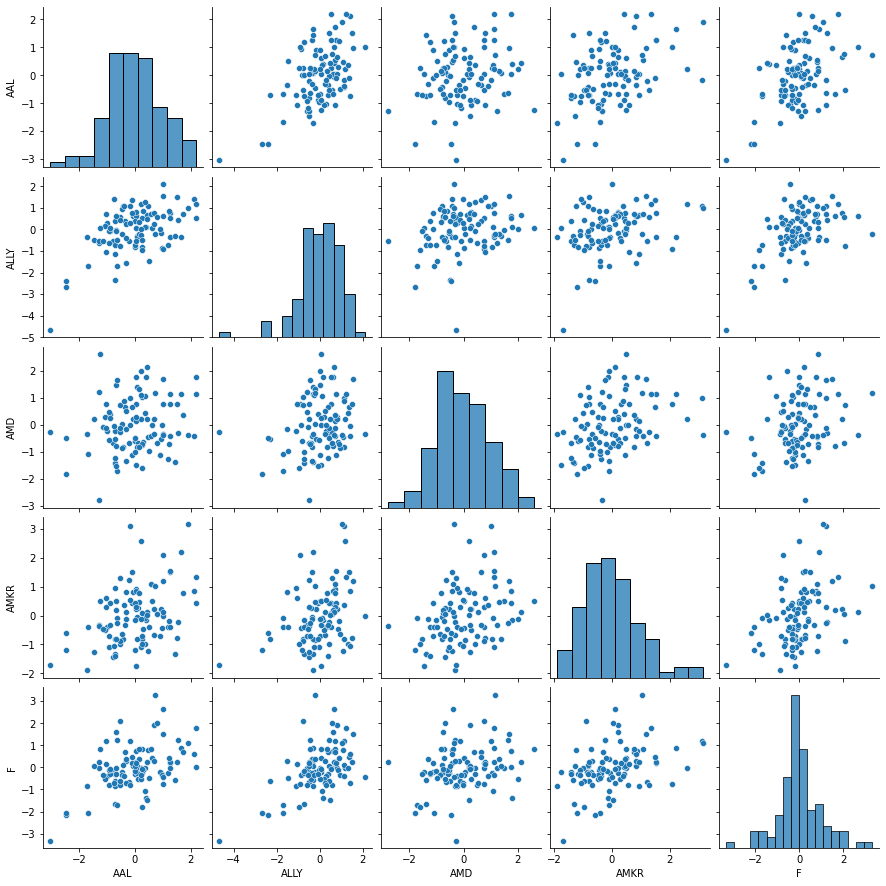

In [16]:
sns.pairplot(n_returns_m)

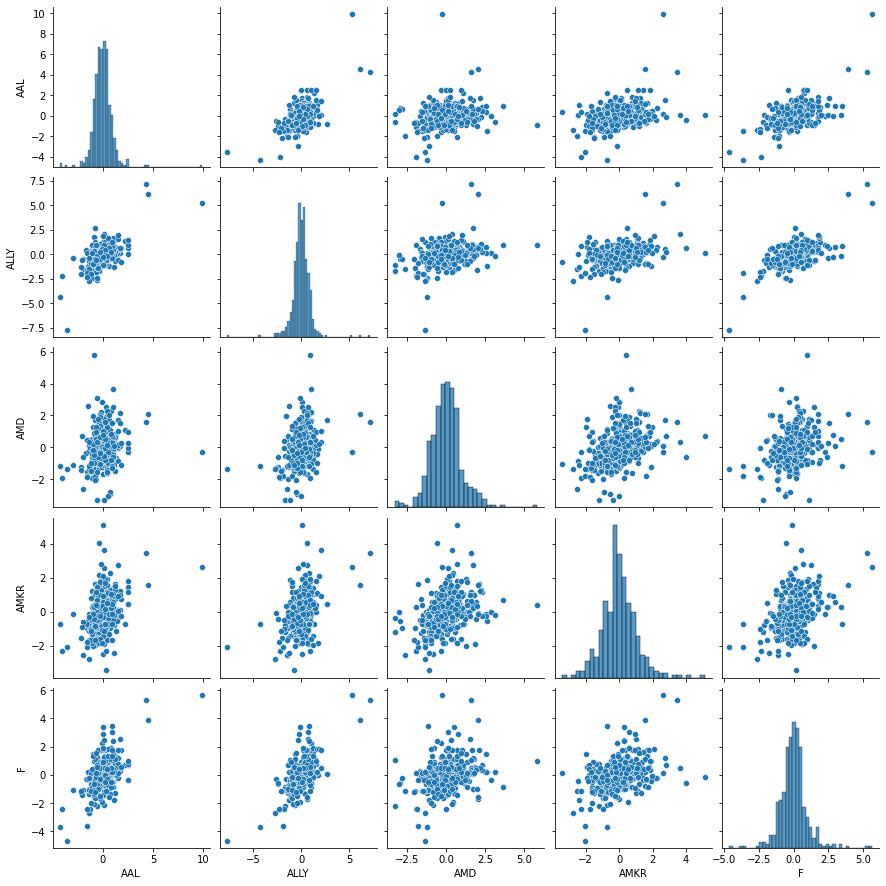

In [17]:
# sns.pairplot(equity_w)
# plt.savefig(path+"equity_w.jpg", bbox_inches='tight', dpi=300)

# sns.pairplot(returns_w)
# plt.savefig(path+"w_returns.jpg", bbox_inches='tight', dpi=300)

sns.pairplot(n_returns_w)
plt.savefig(path+"n_returns_w.jpg", bbox_inches='tight', dpi=300)

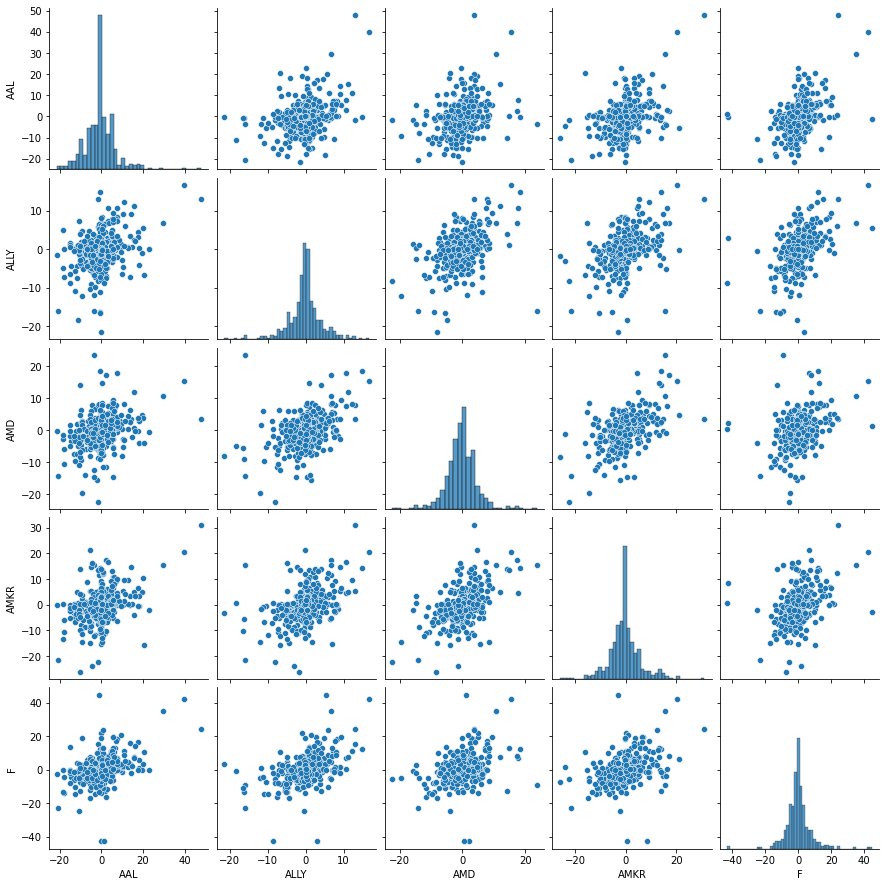

In [18]:
sns.pairplot(cds_diff_d)

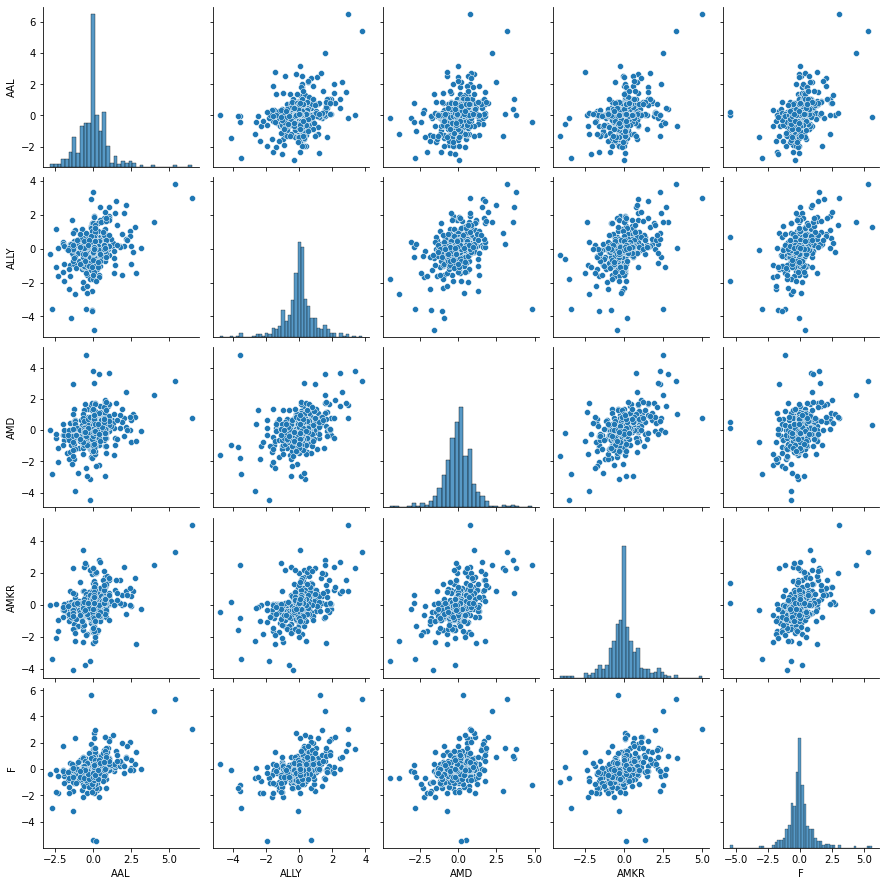

In [19]:
sns.pairplot(n_cds_d)

Once data are exported: 
1. Import data into Matlab
2. Use ksdensity() on each column;
3. Plot histogram of the column
4. Amend the bandwidth until:<br>
    a. histogram have the same height (more or less)<br>
    b. reducing bandwidth doesn't change the shape of the histogram
 5. Save 

## Import from matlab

In [20]:
AAL = pd.read_csv(path+"\\Matlab\\output\\AAL_0.002054.csv", header = None)
ALLY = pd.read_csv(path+"\\Matlab\\output\\ALLY_0.001918.csv", header = None)
AMD = pd.read_csv(path+"\\Matlab\\output\\AMD_0.001031.csv", header = None)
AMKR = pd.read_csv(path+"\\Matlab\\output\\AMKR_0.003334.csv", header = None)
F = pd.read_csv(path+"\\Matlab\\output\\F_0.0004052.csv", header = None)

In [21]:
df = pd.concat([AAL, ALLY, AMD, AMKR, F], axis =1)

In [22]:
df.columns = names

In [23]:
df.to_csv(path+"Pseudo_samples.csv")

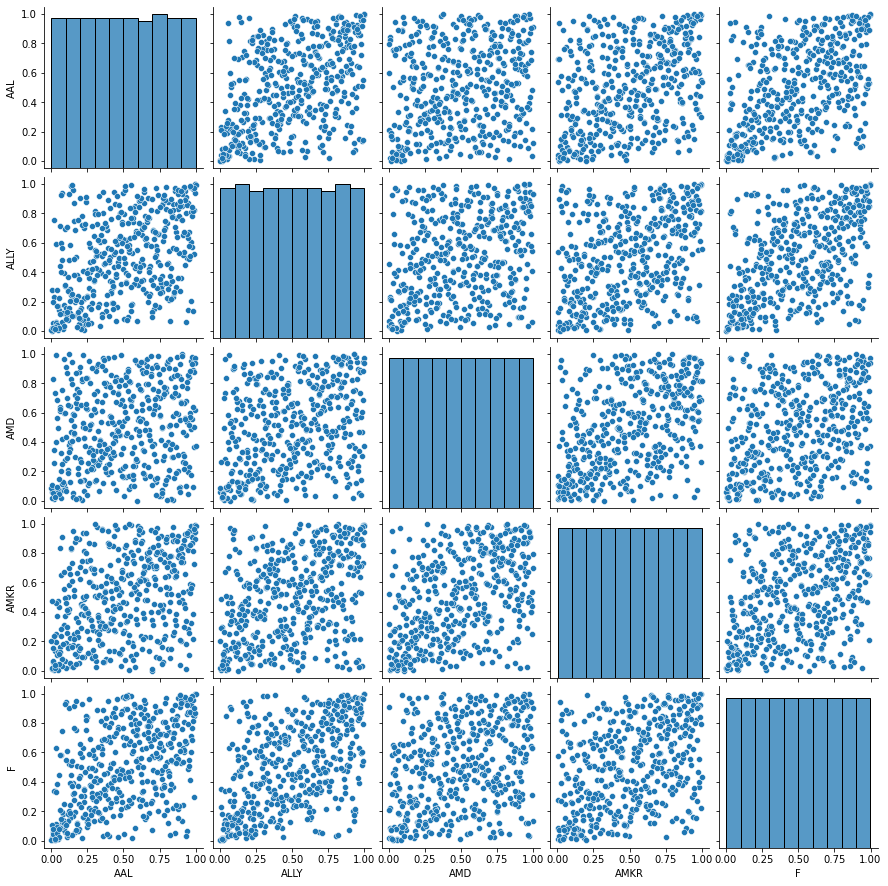

In [24]:
sns.pairplot(df)
plt.savefig(path+"pseudo_sample.jpg", bbox_inches='tight', dpi=300)

In [25]:
def ecdf(data):
    
    """
    Empirical CDF:  
    ----------------------------
    source: 
    https://stackoverflow.com/questions/33345780/empirical-cdf-in-python-similiar-to-matlabs-one
    ----------------------------
    requirement: numpy version >= 1.9.0 || return_counts functionnality
    """

    # convert sample to a numpy array, if it isn't already
    data = np.array(data)

    # find the unique values and their corresponding counts
    quantiles, counts = np.unique(data, return_counts=True)

    # take the cumulative sum of the counts and divide by the sample size to
    # get the cumulative probabilities between 0 and 1
    cumprob = np.cumsum(counts).astype(np.double) / data.size

    return quantiles, cumprob

In [26]:
n_cds_d

,AAL,ALLY,AMD,AMKR,F
1,-0.482021,-0.912204,-0.370802,0.000341,-0.320593
2,-0.200486,0.372299,-3.113531,-0.295191,-0.135035
3,2.497673,-0.876084,-0.776232,-0.060363,0.083342
4,-0.615380,0.602562,-0.226875,0.120151,-0.285248
5,0.743802,1.117266,1.109014,0.485972,0.429211
...,...,...,...,...,...
413,0.075661,0.076570,0.983331,0.091397,0.190637
414,-0.874015,0.074313,-0.569463,1.446051,-0.165330
415,0.310050,-0.797073,0.419784,-0.640245,-0.069396
416,0.085091,-0.004699,-0.867453,0.104177,0.343375


## Data Selection

### Monthly

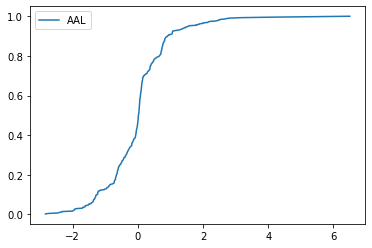

In [27]:
data = n_cds_d
for k in range(len(names[4])):
    x,y = ecdf(data.iloc[:,k])
    plt.plot(x,y, label=  names[k])
    
plt.legend()
plt.show()

### Weekly

In [28]:
equity_m

,AAL,ALLY,AMD,AMKR,F
0,34.815437,22.623171,3.710000,5.835504,10.707307
1,34.504337,24.159313,4.010000,6.762087,10.853411
2,33.061928,20.909676,4.090000,7.836529,11.236062
3,37.860508,20.398836,4.000000,9.965699,11.527209
4,40.500175,20.701881,4.190000,11.020428,12.088143
...,...,...,...,...,...
97,18.250000,42.768829,109.339996,21.666424,16.632353
98,18.770000,39.306400,85.519997,18.763601,13.927506
99,17.870001,43.634724,101.860001,20.389582,13.544911
100,12.680000,33.201622,76.470001,16.908190,11.020092


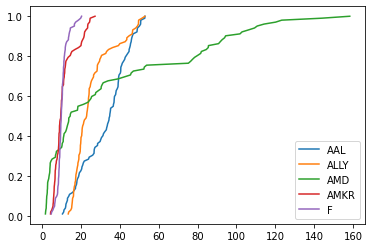

<Figure size 432x288 with 0 Axes>

In [29]:
data = equity_m
for k in range(len(names)):
    x, y = ecdf(data.iloc[:, k])
    plt.plot(x, y, label=names[k])


plt.legend()
plt.show()
plt.savefig(path+"ecdf_Original.jpg")

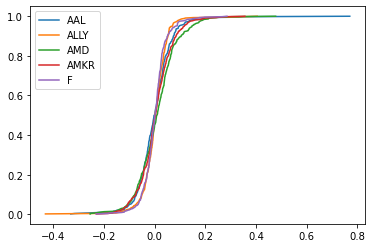

<Figure size 432x288 with 0 Axes>

In [30]:
data = returns_w
for k in range(len(names)):
    x, y = ecdf(data.iloc[:, k])
    plt.plot(x, y, label=names[k])

plt.legend()
plt.show()
plt.savefig(path+"ecdf_return.jpg")

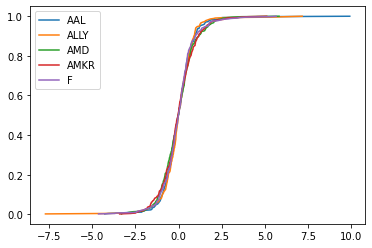

<Figure size 432x288 with 0 Axes>

In [31]:
data = n_returns_w
for k in range(len(names)):
    x, y = ecdf(data.iloc[:, k])
    plt.plot(x, y, label=names[k])

plt.legend()
plt.show()
plt.savefig(path+"ecdf_n_returns.jpg")

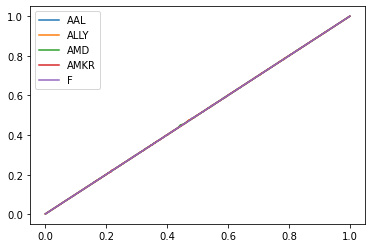

In [32]:
data = df
for k in range(len(names)):
    x, y = ecdf(data.iloc[:, k])
    plt.plot(x, y, label=names[k])

plt.legend()
plt.show()

### CDS

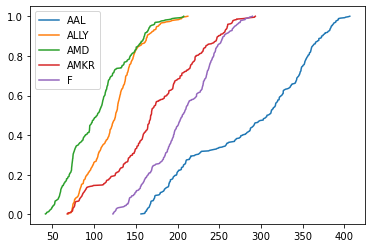

In [33]:

data = cds_d
for k in range(len(names)):
    x,y = ecdf(data.iloc[:,k])
    plt.plot(x,y, label=  names[k])
    
plt.legend()
plt.show()

In [34]:
len(n_returns_w)/len(n_returns_m)

4.356435643564357

Looking at the graphs, we can see that the weekly empirical cdf are smoother than the monthly CDS. The fact that there are more than 4 times observervation compare to the monthly data can explain partially this feature. 

For the next step we will be using ksdensity function with Matlab so 

In [18]:
path_mathlab = r"..\\2022\\2. Data\\Matlab\\"

In [35]:
ksd_01 = pd.read_csv(path_mathlab + "w_ksd_01.csv", header = None)
ksd_001 =  pd.read_csv(path_mathlab + "w_ksd_001.csv", header = None)
ksd_005 = pd.read_csv(path_mathlab + "w_ksd_005.csv", header = None)
ksd_0005 = pd.read_csv(path_mathlab + "w_ksd_0005.csv", header = None)

NameError: name 'path_mathlab' is not defined

In [60]:
import seaborn as sns

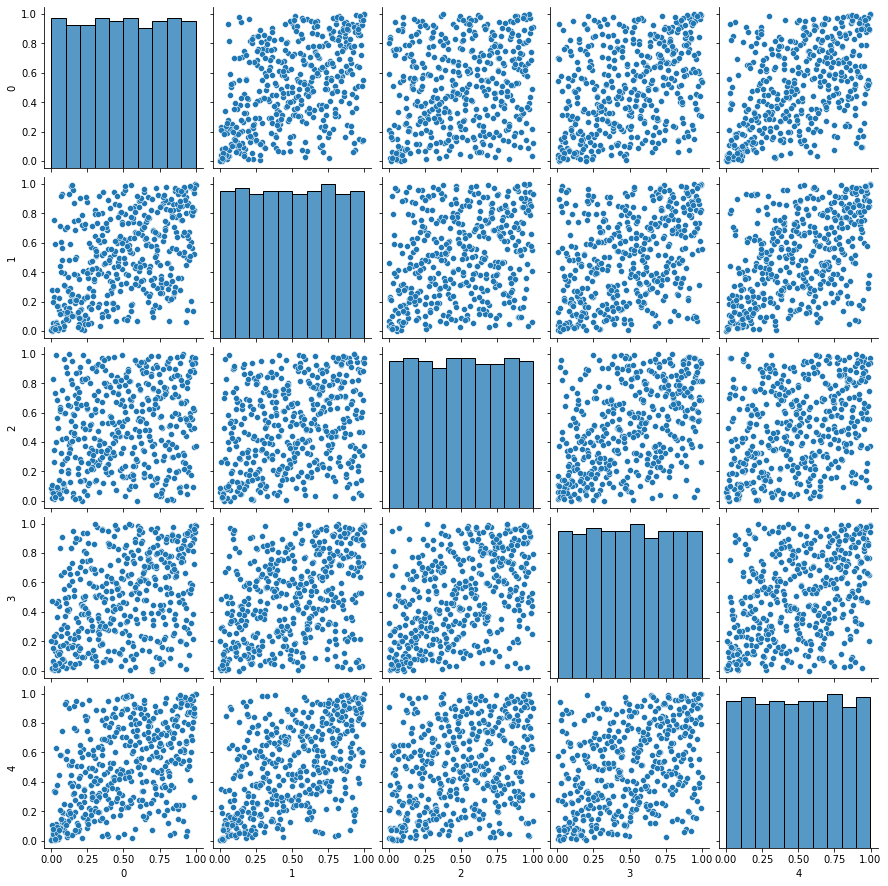

In [61]:
sns.pairplot(ksd_01)

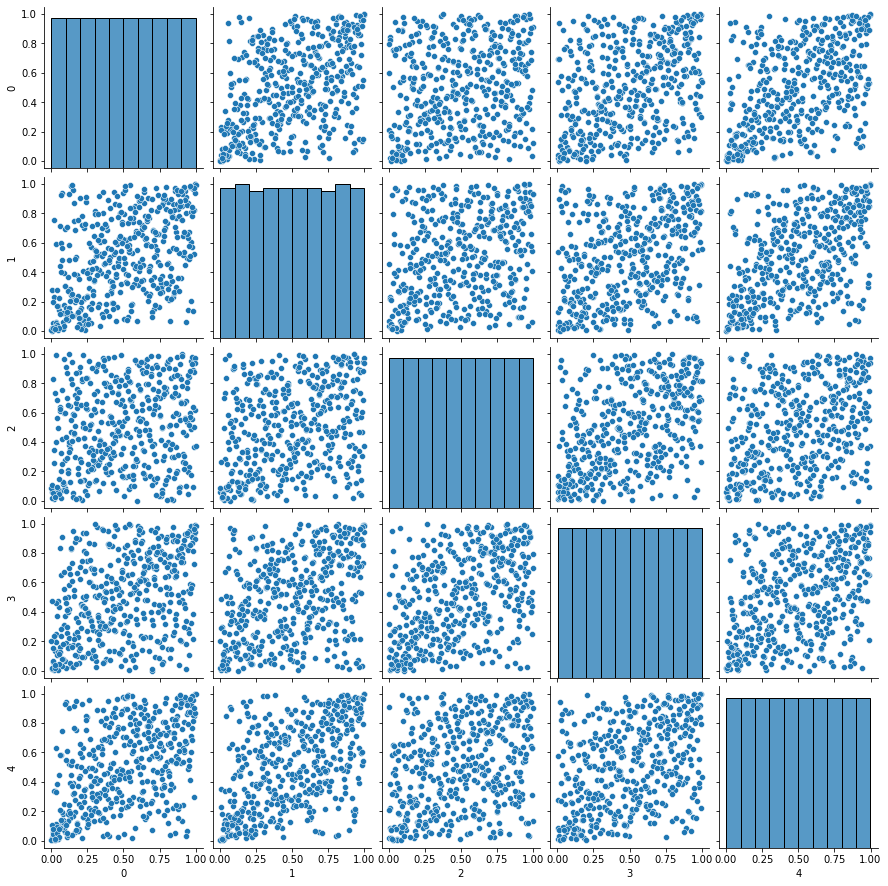

In [62]:
sns.pairplot(ksd_001)

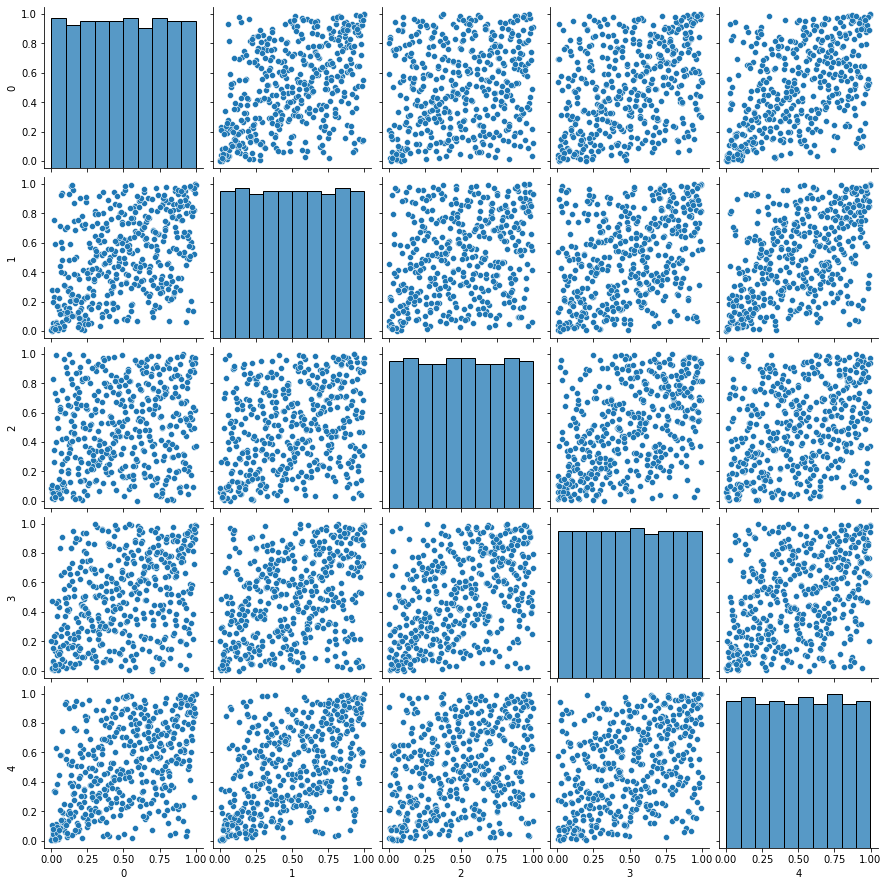

In [63]:
sns.pairplot(ksd_005)

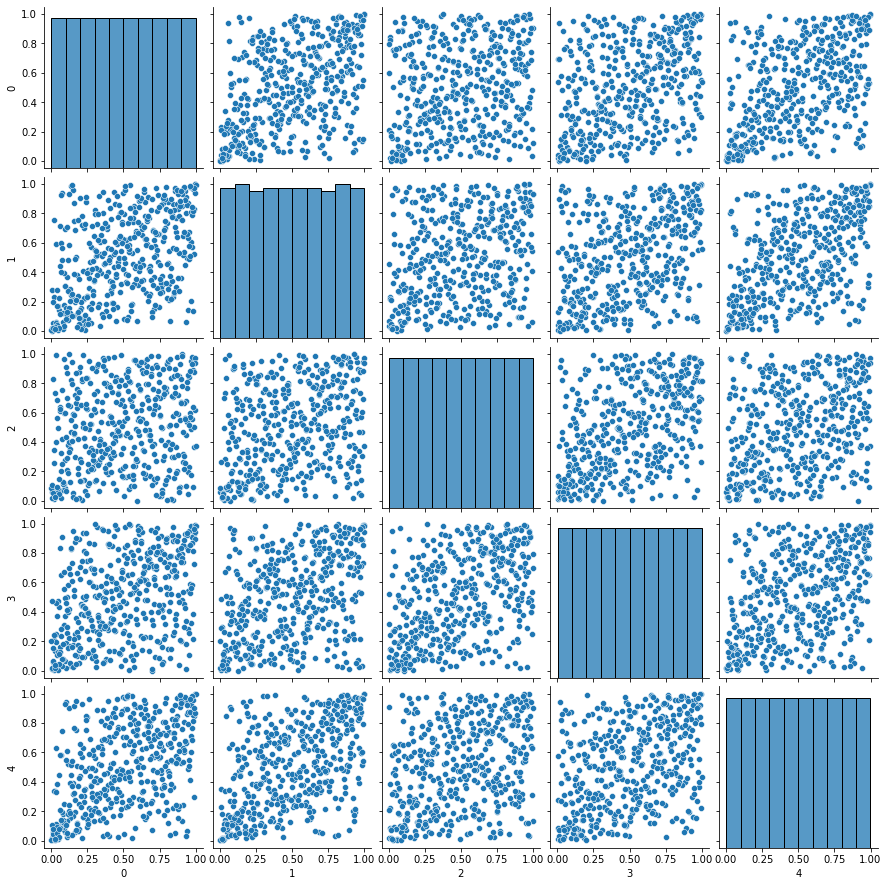

In [64]:
sns.pairplot(ksd_0005)